In [1]:
import numpy as np
import mne
from matplotlib import pyplot as plt
import pandas as pd
from helpers import map_ft9, map_ft10, map_avg


In [2]:
filename = "dataset/chb01/chb01_03.edf"
raw_data = mne.io.read_raw_edf(filename, preload=True)

Extracting EDF parameters from /Users/raunavghosh/Documents/Estimation and Detection/Estimation-and-Detection/dataset/chb01/chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/xb/h53k7r3j5_55k9r3s9dzr_tr0000gn/T/ipykernel_54390/2878033458.py:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(filename, preload=True)


In [3]:
data_ft9, labels_ft9 = map_ft9(raw_data)
data_ft10, labels_ft10 = map_ft10(raw_data)

In [4]:
data_ft9.shape, data_ft10.shape

((15, 921600), (14, 921600))

In [6]:
start_idx = 2996 * 256
stop_idx = 3036 * 256

In [8]:
seizure_data_ft9 = np.concatenate([data_ft9[i, start_idx:stop_idx] for i in range(14)])
seizure_data_ft10 = np.concatenate([data_ft10[i, start_idx:stop_idx] for i in range(14)])

In [10]:
seizure_data_ft9.shape, seizure_data_ft10.shape, 

((153600,), (143360,))

In [11]:
non_seizure_ft9 = []
for i in range(15):
    non_seizure_ft9.extend(data_ft9[i, :start_idx])
    non_seizure_ft9.extend(data_ft9[i, stop_idx:])
non_seizure_ft9 = np.array(non_seizure_ft9)

non_seizure_ft10 = []
for i in range(14):
    non_seizure_ft10.extend(data_ft10[i, :start_idx])
    non_seizure_ft10.extend(data_ft10[i, stop_idx:])
non_seizure_ft10 = np.array(non_seizure_ft10)

In [12]:
non_seizure_ft9.shape, non_seizure_ft10.shape

((13670400,), (12759040,))

[]

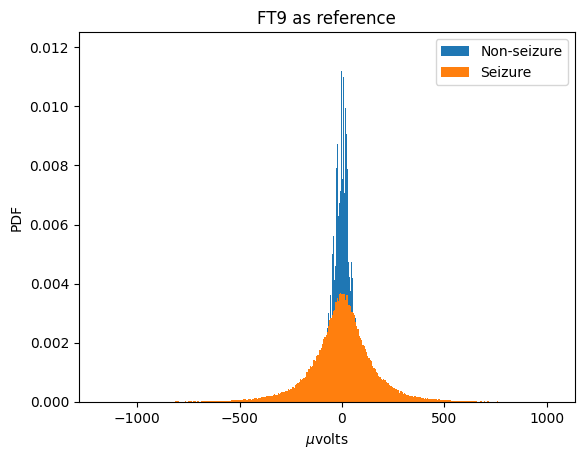

In [13]:
plt.hist(non_seizure_ft9, bins='auto', label="Non-seizure", density=True)
plt.hist(seizure_data_ft9, bins='auto', label="Seizure", density=True)
plt.legend()
plt.title("FT9 as reference")
plt.xlabel("$\mu$volts")
plt.ylabel("PDF")
plt.plot()

[]

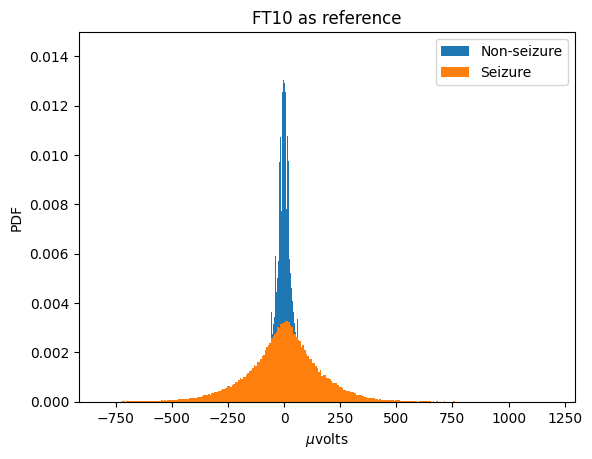

In [14]:
plt.hist(non_seizure_ft10, bins='auto', label="Non-seizure", density=True)
plt.hist(seizure_data_ft10, bins='auto', label="Seizure", density=True)
plt.legend()
plt.title("FT10 as reference")
plt.xlabel("$\mu$volts")
plt.ylabel("PDF")
plt.plot()

# Next to do
- Segment for all the files.
- 

# Segment all data from all files for easier computation

In [18]:
filename = "dataset/chb02/chb02_19.edf"

raw_data = mne.io.read_raw_edf(filename, preload=True)

start_idx = 3369 * 256
stop_idx = 3378 * 256

data_ft9, labels_ft9 = map_ft9(raw_data)
data_ft10, labels_ft10 = map_ft10(raw_data)

seizure_data_ft9 = np.concatenate([data_ft9[i, start_idx:stop_idx] for i in range(15)])
seizure_data_ft10 = np.concatenate([data_ft10[i, start_idx:stop_idx] for i in range(14)])

# seizure_data_ft9.shape, seizure_data_ft10.shape, 

non_seizure_ft9 = []
for i in range(14):
    non_seizure_ft9.extend(data_ft9[i, :start_idx])
    non_seizure_ft9.extend(data_ft9[i, stop_idx:])
non_seizure_ft9 = np.array(non_seizure_ft9)

non_seizure_ft10 = []
for i in range(14):
    non_seizure_ft10.extend(data_ft10[i, :start_idx])
    non_seizure_ft10.extend(data_ft10[i, stop_idx:])
non_seizure_ft10 = np.array(non_seizure_ft10)

pd.DataFrame(seizure_data_ft9).to_csv("seizure_data_ft9.csv", mode='a', header=False, index=False, sep=",")
pd.DataFrame(non_seizure_ft9).to_csv("non_seizure_data_ft9.csv", mode='a', header=False, index=False, sep=",")
pd.DataFrame(seizure_data_ft10).to_csv("seizure_data_ft10.csv", mode='a', header=False, index=False, sep=",")
pd.DataFrame(non_seizure_ft10).to_csv("non_seizure_data_ft10.csv", mode='a', header=False, index=False, sep=",")


Extracting EDF parameters from /Users/raunavghosh/Documents/Estimation and Detection/Estimation-and-Detection/dataset/chb02/chb02_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/xb/h53k7r3j5_55k9r3s9dzr_tr0000gn/T/ipykernel_47667/1610984696.py:3: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(filename, preload=True)


In [22]:
seizure_data_ft9 = pd.read_csv("seizure_data_ft9.csv", header=None)
non_seizure_data_ft9 = pd.read_csv("non_seizure_data_ft9.csv", header=None)
seizure_data_ft10 = pd.read_csv("seizure_data_ft10.csv", header=None)
non_seizure_data_ft10 = pd.read_csv("non_seizure_data_ft10.csv", header=None)

[]

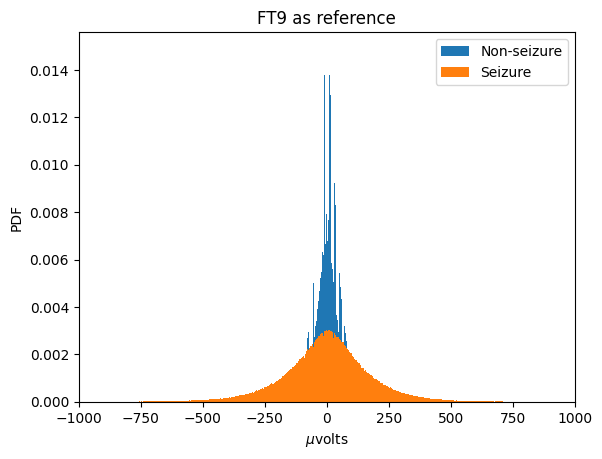

In [28]:
plt.hist(non_seizure_data_ft9, bins='auto', label="Non-seizure", density=True)
plt.hist(seizure_data_ft9, bins='auto', label="Seizure", density=True)
plt.xlim([-1000, 1000])
plt.legend()
plt.title("FT9 as reference")
plt.xlabel("$\mu$volts")
plt.ylabel("PDF")
plt.plot()

[]

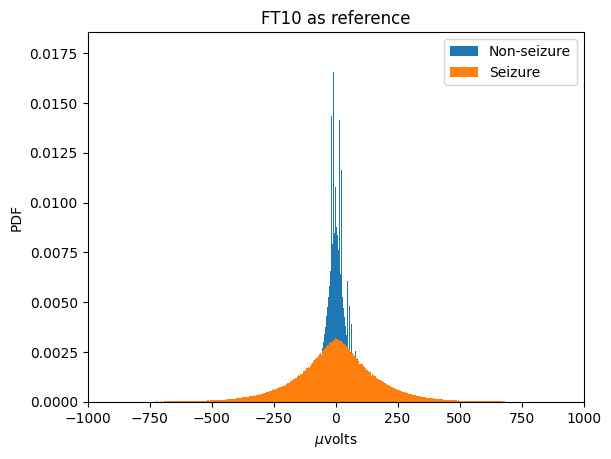

In [29]:
plt.hist(non_seizure_data_ft10, bins='auto', label="Non-seizure", density=True)
plt.hist(seizure_data_ft10, bins='auto', label="Seizure", density=True)
plt.xlim([-1000, 1000])
plt.legend()
plt.title("FT10 as reference")
plt.xlabel("$\mu$volts")
plt.ylabel("PDF")
plt.plot()

In [5]:
temp = map_avg(raw_data)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


In [6]:
temp.plot()

AttributeError: 'NoneType' object has no attribute 'plot'